In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../../data/diffraction_comparison/detector_1um/'
#data_dir = '../../data/diffraction_comparison/detector_bitran/'
#data_dir = '../../data/diffraction_comparison/detector_bitran4097/'

In [2]:
import math
intensity_sommerfeld = np.fromfile(data_dir + 'sommerfeld_focus.intensity')
intensity_fresnel = np.fromfile(data_dir + 'fresnel_diffraction_focus.intensity')
N = int(math.sqrt(intensity_sommerfeld.shape[0]))
intensity_sommerfeld = intensity_sommerfeld.reshape((N, N))
intensity_fresnel = intensity_fresnel.reshape((N, N))

intensity_sommerfeld /= np.sum(intensity_sommerfeld)
intensity_fresnel /= np.sum(intensity_fresnel)

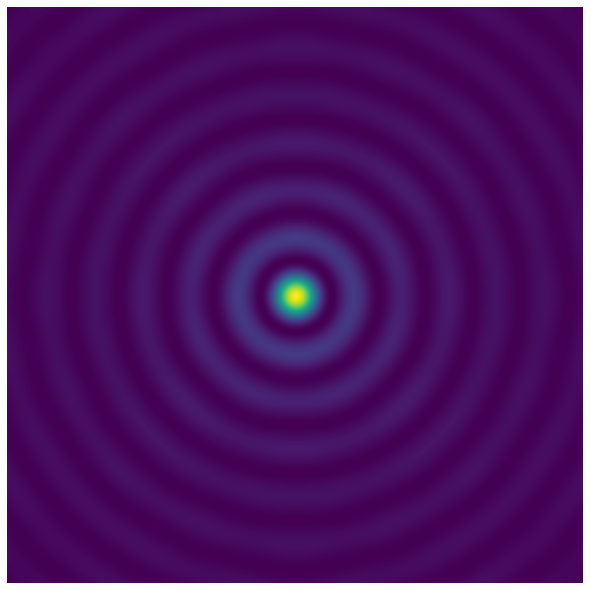

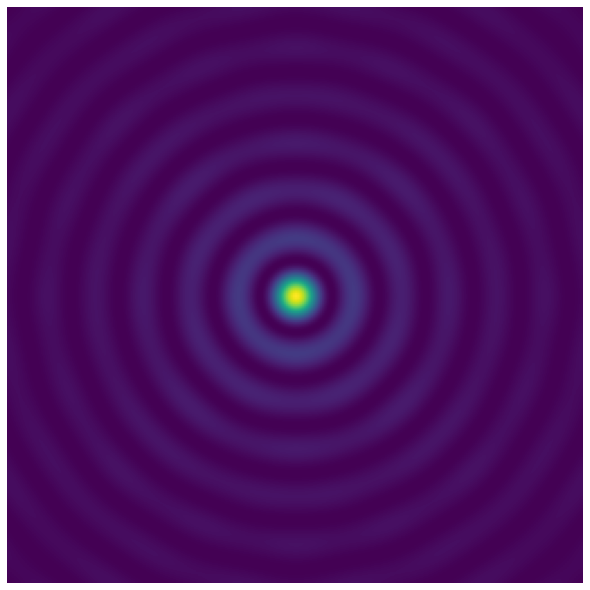

In [3]:
K = 256

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(intensity_sommerfeld[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(intensity_fresnel[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])

FWHM(sommerfeld):  1.700415140415152e-05
FWHM(fresnel):  1.50036630036628e-05


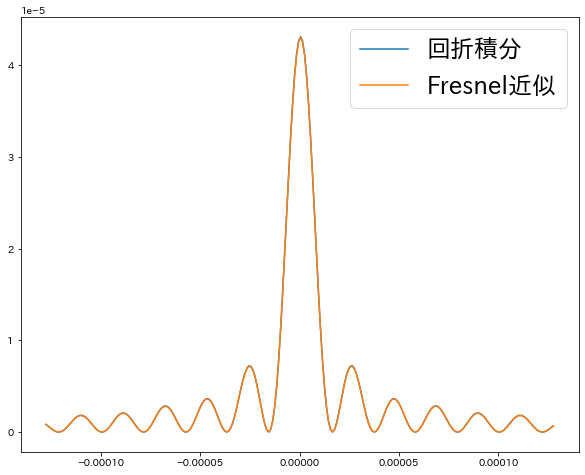

In [9]:
from matplotlib import rcParams

def getFWHM(profile):
    x = np.linspace(-0.5 * focus_length, 0.5 * focus_length, N)
    profile_max = np.max(profile)
    diff = profile - 0.5 * profile_max
    min_index = np.argmin(np.abs(diff))
    return 2.0 * abs(x[min_index])   

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

focus_pixel = 1.0e-6
focus_length = focus_pixel * N
x = np.linspace(-0.5 * focus_length, 0.5 * focus_length, N)

profile_sommerfeld = intensity_sommerfeld[N//2]
profile_fresnel = intensity_fresnel[N//2]

print('FWHM(sommerfeld): ', getFWHM(profile_sommerfeld))
print('FWHM(fresnel): ', getFWHM(profile_fresnel))

fig = plt.figure(figsize=(10, 8))
plt.plot(x[(N//2-K//2):(N//2+K//2)], profile_sommerfeld[(N//2-K//2):(N//2+K//2)], label='回折積分')
plt.plot(x[(N//2-K//2):(N//2+K//2)], profile_fresnel[(N//2-K//2):(N//2+K//2)], label='Fresnel近似')

plt.legend(fontsize=24, loc='upper right')
fig.savefig('../../thesis/chap2/figure/diffraction_comparison_profile.png')

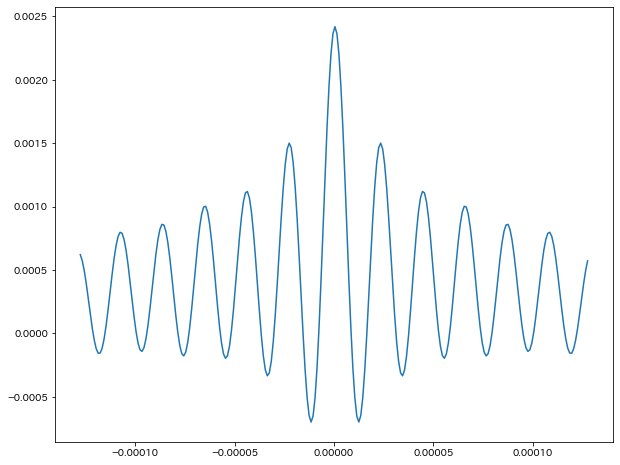

In [5]:
fig = plt.figure(figsize=(10, 8))
diff_normalized = (profile_sommerfeld - profile_fresnel) / np.max(profile_sommerfeld)
plt.plot(x[(N//2-K//2):(N//2+K//2)], diff_normalized[(N//2-K//2):(N//2+K//2)])
fig.savefig('../../thesis/chap2/figure/diffraction_comparison_normalized_diff.png')

In [6]:
np.max(np.abs(diff_normalized))

0.002418227309060414

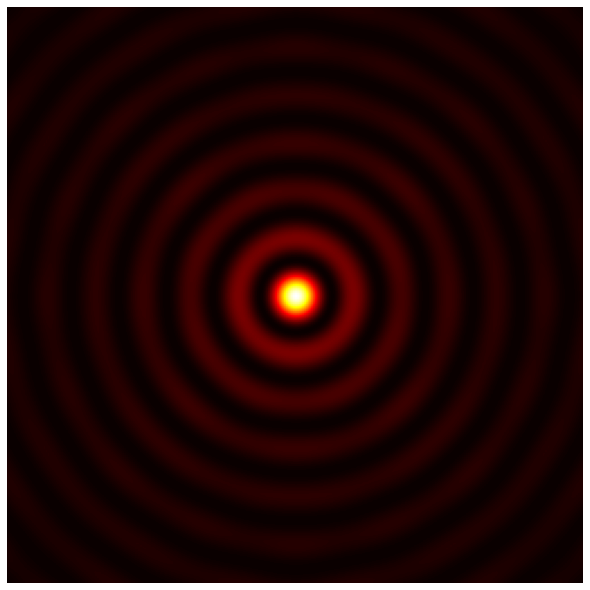

In [7]:
K = 256

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
intensity_adjusted = intensity_sommerfeld[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)].copy()
#plt.imshow(intensity_adjusted, cmap='gist_stern')
plt.imshow(intensity_adjusted, cmap='hot')
fig.savefig('../resource/chap2/method/focus_zoom.png')